In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('../../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 

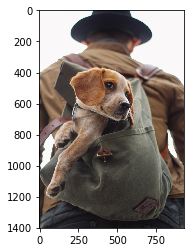

In [5]:
plt.imshow(img1)

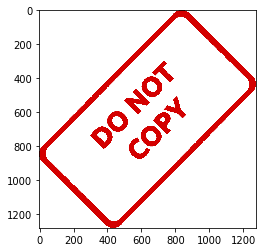

In [6]:
plt.imshow(img2)

In [7]:
img1.shape

(1401, 934, 3)

In [8]:
img2.shape

(1280, 1277, 3)

In [10]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2, (1200,1200))

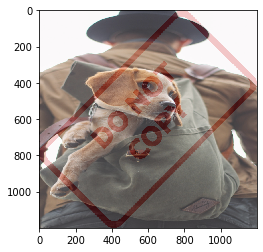

In [11]:
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.2,gamma=0)
plt.imshow(blended)

In [12]:
# Overlay small image on top of layer image(NO BLENDING)
# Numpy Reassignment
# Bleand together images of different sizes

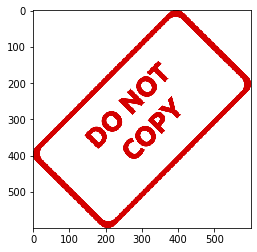

In [13]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img2)

In [14]:
large_img = img1
small_img = img2

In [15]:
x_offset = 0
y_offset = 0

In [16]:
x_end = x_offset+small_img.shape[1]
y_end = y_offset+small_img.shape[0]

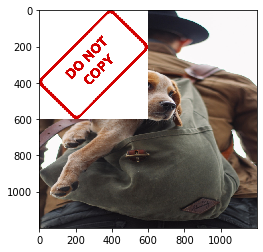

In [17]:
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

# Part-2 (Region of Interest)

In [42]:
img1 = cv2.imread('../../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 
img2 =cv2.resize(img2,(600,600))

In [43]:
img1.shape

(1401, 934, 3)

In [44]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [45]:
rows, cols, channels = img2.shape

In [46]:
roi = img1[y_offset:1401, x_offset:934]

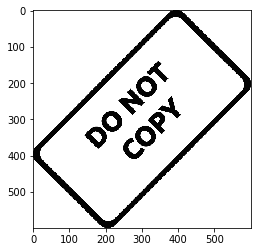

In [47]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray,cmap='gray')

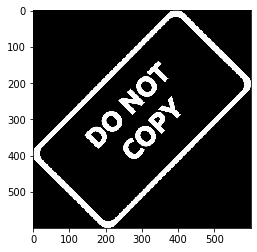

In [48]:
# Reversing black to white and vice versa
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv,cmap='gray')

In [49]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)
white_background.shape

(600, 600, 3)

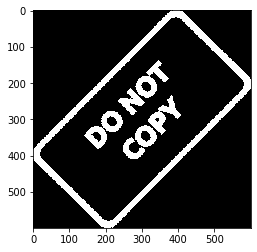

In [50]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
plt.imshow(bk)

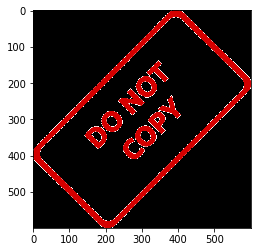

In [51]:
# Replace it with original image
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

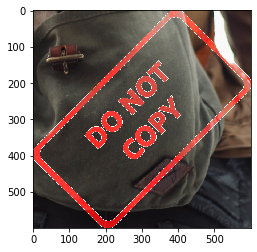

In [52]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

In [54]:
large_img = img1
small_img = final_roi

In [55]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

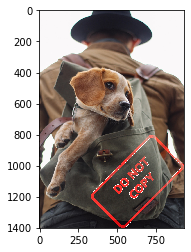

In [56]:
plt.imshow(large_img)